 #### Escolha pelo menos duas técnicas de tratamento de classes desbalanceadas e aplique no dataset "data/bank-full.csv" e compare a performance do modelo.

In [78]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [79]:
from ml_utils import *

In [80]:
# Importa os pacotes de manipulação e visualização de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = "{:,.2f}".format

In [82]:
df = pd.read_csv('bank-full.csv')

In [84]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
df['Target'].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [10]:
df.contact.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [11]:
df.poutcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [12]:
y = df['Target'].copy()
X = df.drop('Target', axis=1).copy()

In [13]:
# particionar dados
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42) 

In [14]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder 

In [15]:
#X_test.drop(['day', 'month'], axis='columns', inplace=True)

In [16]:
#X_train.drop(['day', 'month'], axis='columns', inplace=True)

In [17]:
X_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
24001,36,technician,divorced,secondary,no,861,no,no,telephone,29,aug,140,2,-1,0,unknown
43409,24,student,single,secondary,no,4126,no,no,cellular,5,apr,907,4,185,7,failure
20669,44,technician,single,secondary,no,244,yes,no,cellular,12,aug,1735,4,-1,0,unknown
18810,48,unemployed,married,secondary,no,0,no,no,telephone,31,jul,35,11,-1,0,unknown
23130,38,technician,married,secondary,no,257,no,no,cellular,26,aug,57,10,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17958,50,blue-collar,married,secondary,no,917,yes,no,cellular,30,jul,58,2,-1,0,unknown
15941,36,admin.,single,secondary,no,22,yes,no,cellular,22,jul,77,5,-1,0,unknown
16952,45,blue-collar,married,secondary,no,79,yes,no,cellular,25,jul,98,1,-1,0,unknown
34781,27,management,single,tertiary,no,2559,yes,no,cellular,6,may,227,1,-1,0,unknown


In [18]:
X_train_model = X_train.select_dtypes(include=np.number)

In [19]:
X_test_model = X_test.select_dtypes(include=np.number)

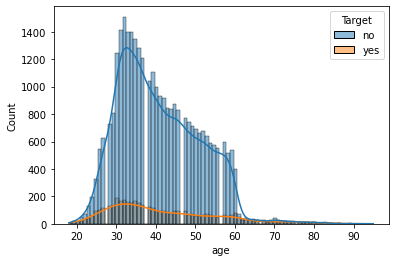

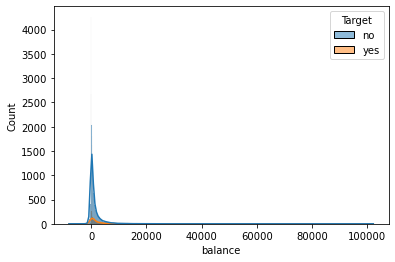

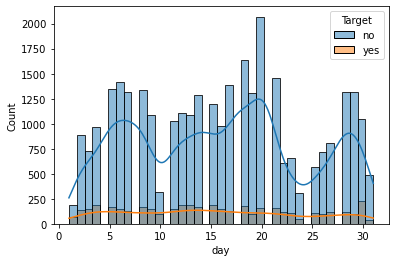

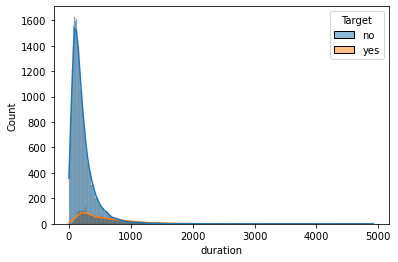

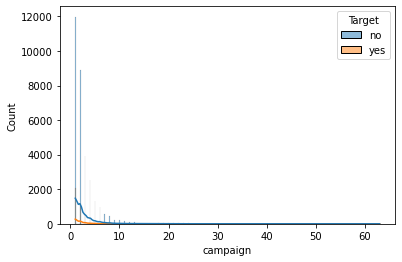

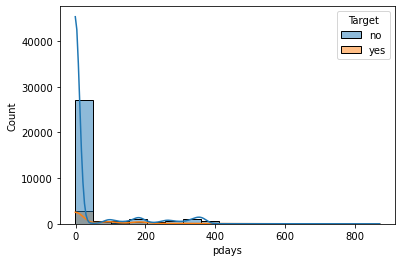

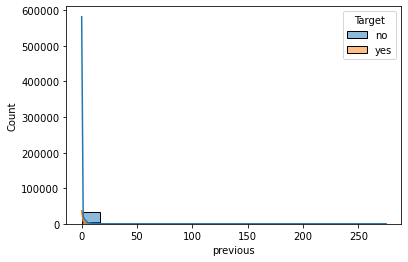

In [20]:
for col in X_train_model:
    
    sns.histplot(data=X_train_model, x=col, kde=True, hue=y_train)
    
    plt.show()

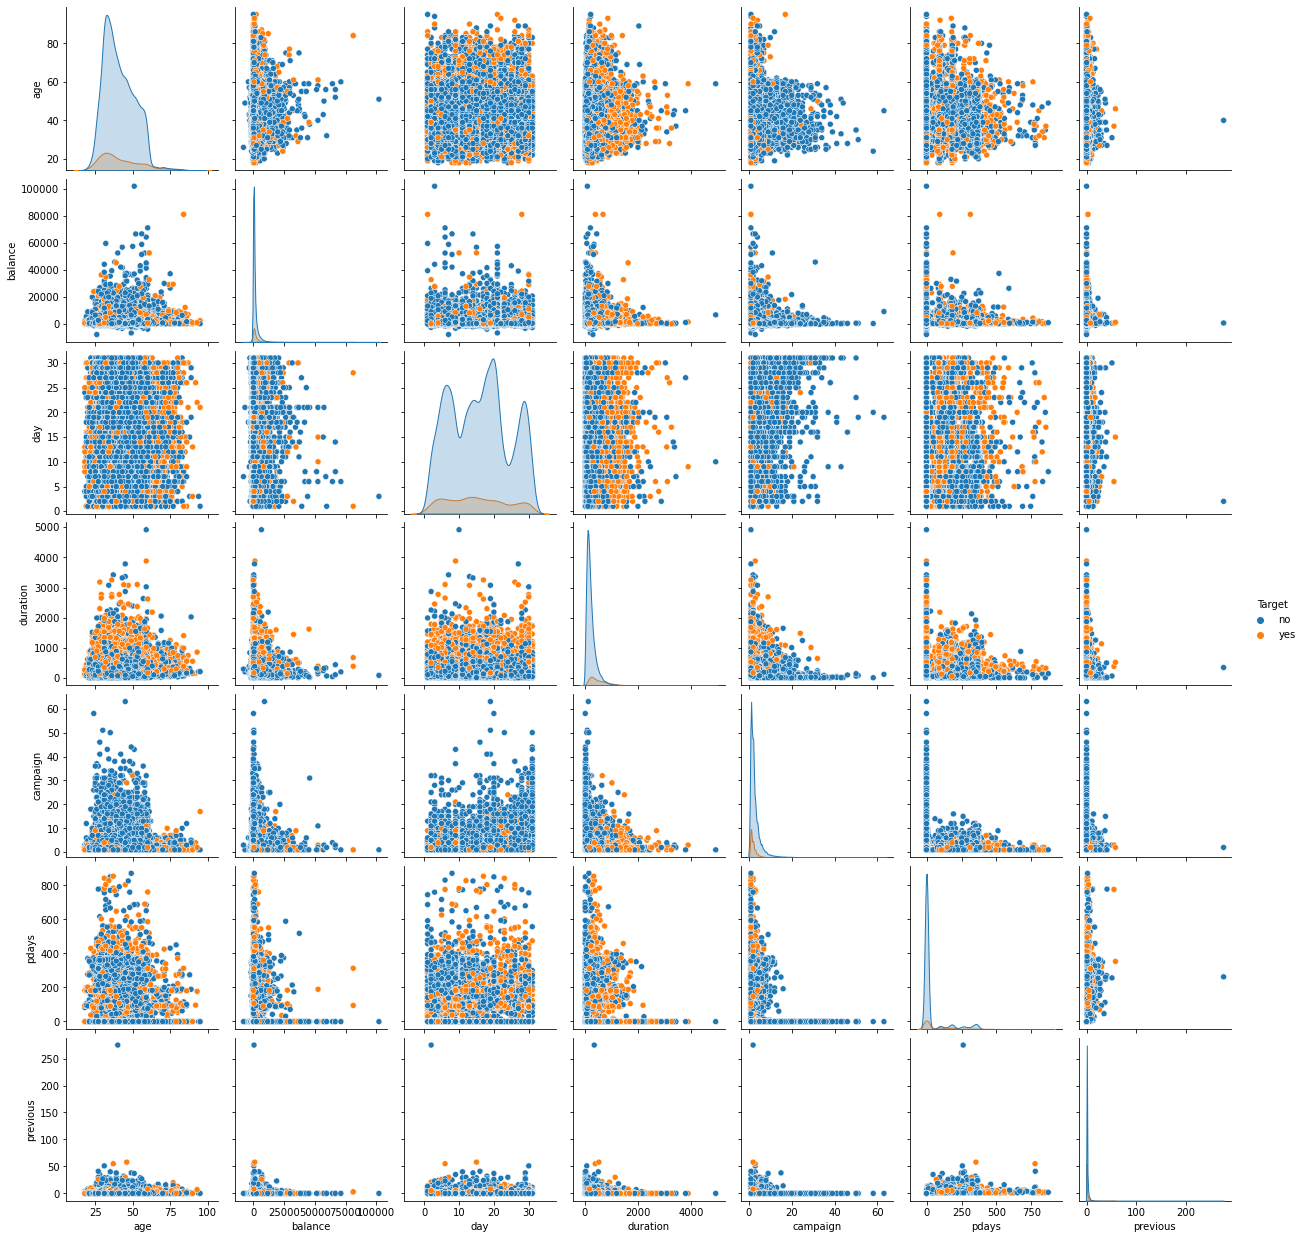

In [21]:
sns.pairplot(data=pd.concat([X_train_model, y_train], axis=1), hue="Target")

In [22]:
dummy_encoder = OneHotEncoder(sparse=False)

In [23]:
cat = X_test.select_dtypes(include=object).columns

In [24]:
X_train_model = X_train_model.reset_index(drop=True)

In [25]:
X_train_ohe = dummy_encoder.fit_transform(X_train[cat])



X_train_enc = pd.DataFrame(X_train_ohe, columns=dummy_encoder.get_feature_names_out(cat))

X_train_model = pd.concat([X_train_model, X_train_enc], axis=1)
X_train_model

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,36,861,29,140,2,-1,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
1,24,4126,5,907,4,185,7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
2,44,244,12,1735,4,-1,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
3,48,0,31,35,11,-1,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
4,38,257,26,57,10,-1,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36163,50,917,30,58,2,-1,0,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
36164,36,22,22,77,5,-1,0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
36165,45,79,25,98,1,-1,0,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
36166,27,2559,6,227,1,-1,0,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00


In [26]:
X_test_model = X_test_model.reset_index(drop=True)

X_test_ohe = dummy_encoder.transform(X_test[cat])



X_test_enc = pd.DataFrame(X_test_ohe, columns=dummy_encoder.get_feature_names_out(cat))

X_test_model = pd.concat([X_test_model, X_test_enc], axis=1)
X_test_model

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,40,640,8,347,2,-1,0,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
1,44,378,30,203,2,-1,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
2,31,356,20,228,5,-1,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
3,36,655,23,153,4,-1,0,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
4,34,1921,4,61,1,-1,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9038,26,-333,4,692,1,-1,0,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
9039,49,884,8,201,3,-1,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
9040,32,964,22,370,2,-1,0,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
9041,20,0,2,69,4,182,4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00


In [27]:
y_train

24001     no
43409    yes
20669    yes
18810     no
23130     no
        ... 
17958     no
15941     no
16952     no
34781     no
44229    yes
Name: Target, Length: 36168, dtype: object

In [28]:
label_encoder = LabelEncoder()

# Treinando os encoders já transformando os dados.
y_train = label_encoder.fit_transform(y_train)

In [29]:
y_test = label_encoder.fit_transform(y_test)

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
minmax_scaler = MinMaxScaler()

# Treinando o encoder e transformando os dados de entrada.
X_train_model = minmax_scaler.fit_transform(X_train_model)

In [32]:
X_test_model = minmax_scaler.transform(X_test_model)

In [33]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression().fit(X_train_model, y_train)

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
proba_1 = logit.predict_proba(X_test_model)[:, 1]

proba_1

array([0.00849665, 0.01218047, 0.02321744, ..., 0.06664995, 0.05682199,
       0.02804952])

In [35]:
y_pred = logit.predict(X_test_model)

In [36]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[7795  190]
 [ 717  341]]


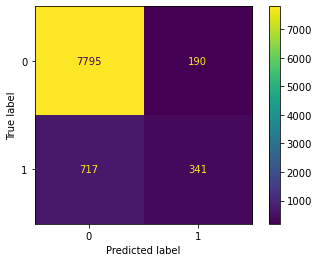

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [38]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7985
           1       0.64      0.32      0.43      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.65      0.69      9043
weighted avg       0.88      0.90      0.88      9043



In [39]:
from imblearn.over_sampling import ADASYN 
from collections import Counter

print('Original dataset shape %s' % Counter(y_train))
sm = ADASYN(random_state=42)
X_res, y_res = sm.fit_resample(X_train_model, y_train)
print('Original dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 31937, 1: 4231})
Original dataset shape Counter({1: 32221, 0: 31937})


In [40]:
X_res.shape, y_res.shape

((64158, 51), (64158,))

In [41]:
logit = LogisticRegression().fit(X_res, y_res)

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
y_pred = logit.predict(X_test_model)

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      7985
           1       0.41      0.82      0.55      1058

    accuracy                           0.84      9043
   macro avg       0.69      0.83      0.72      9043
weighted avg       0.91      0.84      0.86      9043



In [44]:
from imblearn.over_sampling import SMOTE 
from collections import Counter

print('Original dataset shape %s' % Counter(y_train))
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_model, y_train)
print('Original dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 31937, 1: 4231})
Original dataset shape Counter({0: 31937, 1: 31937})


In [45]:
logit = LogisticRegression().fit(X_res, y_res)

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
y_pred = logit.predict(X_test_model)

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91      7985
           1       0.42      0.81      0.55      1058

    accuracy                           0.85      9043
   macro avg       0.70      0.83      0.73      9043
weighted avg       0.91      0.85      0.87      9043



In [48]:
from imblearn.under_sampling import EditedNearestNeighbours 
from collections import Counter

print('Original dataset shape %s' % Counter(y_train))
sm = EditedNearestNeighbours()
X_res, y_res = sm.fit_resample(X_train_model, y_train)
print('Original dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 31937, 1: 4231})
Original dataset shape Counter({0: 27275, 1: 4231})


In [49]:
logit = LogisticRegression().fit(X_res, y_res)

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
y_pred = logit.predict(X_test_model)

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      7985
           1       0.58      0.51      0.54      1058

    accuracy                           0.90      9043
   macro avg       0.76      0.73      0.74      9043
weighted avg       0.90      0.90      0.90      9043



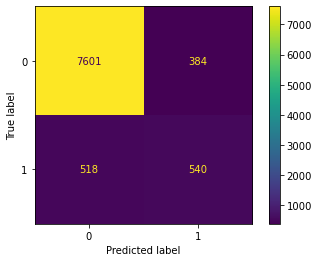

In [52]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [53]:
from imblearn.combine import SMOTEENN 
from collections import Counter

print('Original dataset shape %s' % Counter(y_train))
sm = SMOTEENN()
X_res, y_res = sm.fit_resample(X_train_model, y_train)
print('Original dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 31937, 1: 4231})
Original dataset shape Counter({1: 27641, 0: 24201})


In [54]:
logit = LogisticRegression().fit(X_res, y_res)

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
y_pred = logit.predict(X_test_model)

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89      7985
           1       0.39      0.84      0.53      1058

    accuracy                           0.82      9043
   macro avg       0.68      0.83      0.71      9043
weighted avg       0.91      0.82      0.85      9043



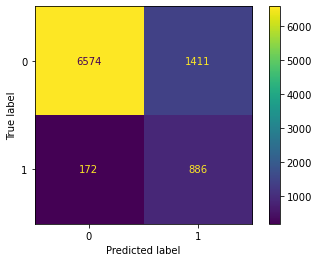

In [57]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [58]:
from imblearn.under_sampling import RandomUnderSampler 
from collections import Counter

print('Original dataset shape %s' % Counter(y_train))
sm = RandomUnderSampler(random_state=42)
X_res, y_res = sm.fit_resample(X_train_model, y_train)
print('Original dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 31937, 1: 4231})
Original dataset shape Counter({0: 4231, 1: 4231})


In [59]:
logit = LogisticRegression().fit(X_res, y_res)

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
y_pred = logit.predict(X_test_model)

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91      7985
           1       0.42      0.80      0.55      1058

    accuracy                           0.85      9043
   macro avg       0.69      0.83      0.73      9043
weighted avg       0.90      0.85      0.86      9043



In [62]:
from imblearn.over_sampling import SMOTE 


print('Original dataset shape %s' % Counter(y_train))
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_model, y_train)
print('Original dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 31937, 1: 4231})
Original dataset shape Counter({0: 31937, 1: 31937})


In [63]:
logit = LogisticRegression().fit(X_res, y_res)

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [64]:
y_pred = logit.predict(X_test_model)

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91      7985
           1       0.42      0.81      0.55      1058

    accuracy                           0.85      9043
   macro avg       0.70      0.83      0.73      9043
weighted avg       0.91      0.85      0.87      9043



In [66]:
y_pred = logit.predict(X_res)

In [67]:
print(classification_report(y_res, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85     31937
           1       0.85      0.85      0.85     31937

    accuracy                           0.85     63874
   macro avg       0.85      0.85      0.85     63874
weighted avg       0.85      0.85      0.85     63874



## With KNN

In [68]:
# Instancia o modelo considerando 3 vizinhos mais próximos e distância euclidiana
k=2
clf = KNeighborsClassifier(n_neighbors=k, 
                           p=2, weights='distance')

In [69]:
clf.fit(X_res, y_res)

KNeighborsClassifier(n_neighbors=2, weights='distance')

In [70]:
# Utiliza o modelo treinado para predizer no dataset de teste
y_pred = clf.predict(X_test_model)

In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      7985
           1       0.36      0.46      0.41      1058

    accuracy                           0.84      9043
   macro avg       0.65      0.68      0.66      9043
weighted avg       0.86      0.84      0.85      9043



In [72]:
y_pred = clf.predict(X_res)

In [73]:
print(classification_report(y_res, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31937
           1       1.00      1.00      1.00     31937

    accuracy                           1.00     63874
   macro avg       1.00      1.00      1.00     63874
weighted avg       1.00      1.00      1.00     63874



## With DecisionTreeClassifier

In [74]:
from sklearn.tree import DecisionTreeClassifier, plot_tree 

# Instância modelo de classificação
model = DecisionTreeClassifier()

# Treina o modelo
model.fit(X_train_model, y_train)

# Prediz nos dados de teste
y_pred = model.predict(X_test_model)

y_pred

array([0, 0, 0, ..., 0, 0, 0])

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7985
           1       0.47      0.49      0.48      1058

    accuracy                           0.88      9043
   macro avg       0.70      0.71      0.70      9043
weighted avg       0.88      0.88      0.88      9043



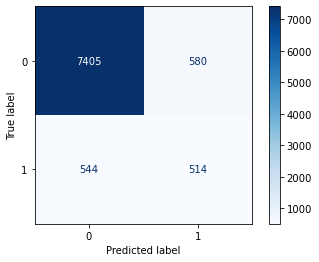

In [75]:
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(cm).plot(cmap='Blues')

In [76]:
y_pred = model.predict(X_train_model)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31937
           1       1.00      1.00      1.00      4231

    accuracy                           1.00     36168
   macro avg       1.00      1.00      1.00     36168
weighted avg       1.00      1.00      1.00     36168



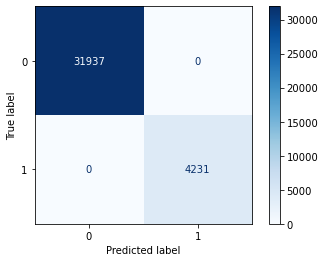

In [77]:
print(classification_report(y_train, y_pred))

cm = confusion_matrix(y_train, y_pred)

ConfusionMatrixDisplay(cm).plot(cmap='Blues')